# pandas 前処理

1. **Correlating.** <font color = "RED">(関連付け)関連要素を見つけたい。</font>
1. **Completing.**<font color = "RED">(補完)関連要素っぽい、が、NaNがある要素は埋めておきたい。</font>
1. **Correcting.**<font color = "RED">(削除)補正という名の削除。いらないやつはdropしておきたい。</font>
1. **Creating.**<font color = "RED">(追加・簡略)Age bandsや複数要素の統合などして、簡潔にしておきたい。</font>
1. **Classifying.**<font color = "RED">(分類)その他、既存要素で分類できるものは、しておきたい。</font>

__データ準備__

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_csv("testdata/train.csv") #if no header, add ", header=None"
test_df = pd.read_csv("testdata/test.csv") #教師なし

In [3]:
combine = [train_df, test_df] # データラングリングで使う

In [4]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
test_df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


* * * * * 

## (3. Correcting) XXXな行を削除・置換する

### 不要な列を削除

In [424]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [268]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C


### 指定した列名での欠損値を含む行を抜く

df.dropna(subset=['a'])

df.dropna(axis=1, subset=['y'])

### ある数値(int64)が同じである行を抜く

In [32]:
log_df = pd.read_csv("testdata/testinput.csv")

In [33]:
log_df[log_df.loc[:,"Event ID"] == 1000]

,Level,Date and Time,Source,Event ID,Task Category,Log,Computer,Unnamed: 7
6,Error,9/15/2017 8:33,Application Error,1000,-100,Application,testhost149.primary.local,"Faulting application name: OUTLOOK.EXE, versio..."
30,Error,9/15/2017 8:42,Application Error,1000,-100,Application,testhost284.primary.local,"Faulting application name: OUTLOOK.EXE, versio..."


### ある文字列が含んでいる行を抜く

In [34]:
log_df.iloc[:,7].head()

0      PRIMARY\sulaiman  
1    PRIMARY\mahendrars  
2       PRIMARY\pahlevi  
3        PRIMARY\Helena  
4         PRIMARY\lucky  
Name: Unnamed: 7, dtype: object

In [130]:
log_df[log_df.iloc[:,7].str.contains("OUTLOOK.EXE")]
# df.iloc[:,7]がSeriesだから.strが使えるのか。

,Level,Date and Time,Source,Event ID,Task Category,Log,Computer,Detail
6,Error,9/15/2017 8:33,Application Error,1000,-100,Application,testhost149.primary.local,"Faulting application name: OUTLOOK.EXE, versio..."
30,Error,9/15/2017 8:42,Application Error,1000,-100,Application,testhost284.primary.local,"Faulting application name: OUTLOOK.EXE, versio..."


__.isinも使えそう__

In [ ]:
# "E" 列に "two" または "four" を値に持つ行を抽出
df2[df2['E'].isin(['two','four'])]

### 正規表現である文字列が含んでいる行を抜く

#### str.match

In [315]:
from pandas import Series, DataFrame
import numpy as np
s2 = Series(['a_b_c', 'c_d_e', np.nan, 'f_g_h'])
#s2.str.split('_')
#s2.str.split('_').apply(Series)
s2.str.split('_').str.get(1)

0      b
1      d
2    NaN
3      g
dtype: object

In [18]:
pop = {'Nevada' : {2001 : "abc", 2002 : "def", 2000 : "opq"},
       'Ohio' : {2000 : "ghi", 2001 : "xyz", 2002: "stu"}}
df2 = DataFrame(pop)
# dfの'A'列の中で先頭が英小文字に当たる行のみを抽出して、dfを更新する
df2

,Nevada,Ohio
2000,opq,ghi
2001,abc,xyz
2002,def,stu


In [21]:
r = '^a[a-z]'
df2[df2['Nevada'].str.match(r)] # df['Nevada'].str.match(r)はブールインデックス

,Nevada,Ohio
2001,abc,xyz


### 正規表現で抽出して、何かする

#### str.extract

In [48]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

    pd.crosstab(train_df['Title'], train_df['Sex'])

#### str.replace

> We can convert the categorical titles to ordinal.
この作業はカテゴリカルデータを序数に変えるための布石だったりする。

In [9]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


### dictを使ってマッピングしながら置換

In [10]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0) #もし該当列にNaNがあれば、0で埋める。
    
train_df.head()

#    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int) と一撃でも良し
 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


* * * * * 

## (4.Creating) 追加する

### 足し合わせて新しい変数にする　

In [52]:
# 自分も含めて何人で乗船したか　
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [53]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [54]:
# ここは最後にdropするだけ
# train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
# test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
# combine = [train_df, test_df]
# 
# train_df.head()

### 掛け合わせて新しい変数にする　

In [56]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,0,0,3
1,0,0,1
2,0,0,3
3,0,0,1
4,0,0,3
5,0,0,3
6,0,0,1
7,0,0,3
8,0,0,3
9,0,0,2


* * * * *

## (1. Correlating) 関連要素を見つける。
### describe()を調整しながら、パーセンタイルをチェック

In [261]:
train_df = pd.read_csv('testdata/train.csv')
test_df = pd.read_csv('testdata/test.csv')
combine = [train_df, test_df]
#combine

In [313]:
train_df.describe()
# Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.
# Review Parch distribution using `percentiles=[.75, .8]`
# SibSp distribution `[.68, .69]`
# Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.072952,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,13.326339,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,0.000000,26.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,36.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [263]:
train_df["Survived"].describe(percentiles=[.61, .62])
# Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.


count    891.000000
mean       0.383838
std        0.486592
min        0.000000
50%        0.000000
61%        0.000000
62%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [264]:
train_df.describe(include=['O'])
# To limit the result to numeric types submit numpy.number.
# To limit it instead to categorical objects submit the numpy.object data type. 
# Strings can also be used in the style of select_dtypes (e.g. df.describe(include=['O']))
# Stringもdescribeできる。ここからだｔEmberkedが3種類ユニークな値があって、一番多いのが"S"ということがわかる。

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dennis, Mr. Samuel",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


## pivotで関連があるかを調査

In [280]:
# 関連あり
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [266]:
# 関連無し
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# 関連がなければ、削除したり、または他の要素とあわせて追加する

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


* * * * *

## (2. Completing) 補完

### Ageにmedianを入れる

全体からmedianを求める => NaNのカラムに代入
ex) TitanicのAgeをやる

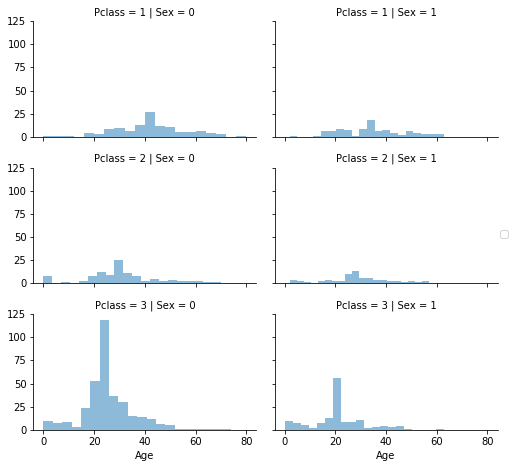

In [22]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [16]:
guess_ages = np.zeros((2,3))
guess_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [23]:
# Sexも更新しておかないとダメ
for dataset in combine:

    # 1回目 i = 0 & j = 0(1)
    # 2回目 i = 0 & j = 1(2)
    #            :
    #            :
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

    for i in range(0, 2):
        for j in range(0, 3):

            # 一括で求めた年齢を代入する。
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()
            

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S,1


### ちょっと足りない変数には最頻値を代入

In [39]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [47]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

# 最後にカテゴリ化もしておく
# for dataset in combine:
#    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
# train_df.head()

,Embarked,Survived
1,1,0.553571
2,2,0.389610
0,0,0.339009


* * * * * * * * *

## (5. Classifying) カテゴリ化 (ex. Mr:1, Mrs:2 とか)

### カテゴリ化、ダミー変数
__例：１__ クロス集計→データ操作(Mr,Mrsに変更)

In [292]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [273]:
test_df["Title"].head(3)

0     Mr
1    Mrs
2     Mr
Name: Title, dtype: object

In [293]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [216]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0.0


(合わせて必要のなくなったNameやPassengeIdの削除も実施)

In [295]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

__例２：__

In [18]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2


### 年齢→階級分け→ダミー変数作成(cut)

pd.cutは設定された数の階級で分ける。

In [25]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [28]:
train_df['AgeBand'].head()

0    (16.0, 32.0]
1    (32.0, 48.0]
2    (16.0, 32.0]
3    (32.0, 48.0]
4    (32.0, 48.0]
Name: AgeBand, dtype: category
Categories (5, interval[float64]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] < (64.0, 80.0]]

In [29]:
#df.loc[<条件はindex側にかく>,<colを指定>] という感じで指定。
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",0,0,1,0,A/5 21171,7.2500,NaN,S,1,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,1,0,PC 17599,71.2833,C85,C,3,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,1,0,113803,53.1000,C123,S,3,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,0,0,0,373450,8.0500,NaN,S,1,"(32.0, 48.0]"


いらないAgebandは削除。

In [30]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",0,0,0,0,373450,8.0500,NaN,S,1


### Fare→均等わけ→ダミー変数(qcut)

- qcutもcut同様に分類。
- qcut は値の大きさ順にデータをｎ等分する。がしかし、データに重複があるとちょっと怪しくなる
- cut は階級わけ

In [62]:
# ex)
data = [1, 10, 100, 2, 20, 200, 3, 30, 300]
pd.qcut(data, 3).value_counts()

(0.999, 7.667]     3
(7.667, 53.333]    3
(53.333, 300.0]    3
dtype: int64

In [59]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,Age*Class
0,892,3,"Kelly, Mr. James",0,0,0,0,330911,7.8292,NaN,2,Mr,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,0,1,0,363272,7.0000,NaN,0,Mrs,2,0,0
2,894,2,"Myles, Mr. Thomas Francis",0,0,0,0,240276,9.6875,NaN,2,Mr,1,1,0
3,895,3,"Wirz, Mr. Albert",0,0,0,0,315154,8.6625,NaN,0,Mr,1,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,0,1,1,3101298,12.2875,NaN,0,Mrs,3,0,0


In [60]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [69]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

In [68]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,Age*Class
0,1,0,3,"Braund, Mr. Owen Harris",0,0,1,0,A/5 21171,0,NaN,0,Mr,2,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,1,0,PC 17599,0,C85,1,Mrs,2,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,0,0,0,STON/O2. 3101282,0,NaN,0,Miss,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,1,0,113803,0,C123,0,Mrs,2,0,0
4,5,0,3,"Allen, Mr. William Henry",0,0,0,0,373450,0,NaN,0,Mr,1,1,0
